In [1]:
# Read in dataset
df <- read.csv("./Movies.csv")

head(df)

,Title,Production_Budget,Worldwide_Gross,Release_Year,CPI,Duration,MPAA_Rating,IMDb_Rating,Voter_Numbers,Genre
,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,Star Wars Ep. VII: The Force Awakens,306000000,2064615817,2015,237.0,2h 18m,PG-13,7.8,931K,Action
2,Spider-Man: No Way Home,200000000,1910041582,2021,271.0,2h 28m,PG-13,8.3,752K,Action
3,The Avengers,225000000,1515100211,2012,229.6,2h 23m,PG-13,8.0,1.4M,Action
4,Top Gun: Maverick,170000000,1488732821,2022,294.4,2h 10m,PG-13,8.4,454K,Action
5,Star Wars Ep. VIII: The Last Jedi,262000000,1331635141,2017,245.1,2h 32m,PG-13,6.9,633K,Action
6,Jurassic World: Fallen Kingdom,170000000,1308323302,2018,251.1,2h 8m,PG-13,6.1,318K,Action


In [2]:
# Find variables with missing values
colSums(is.na(df))

Title Production_Budget   Worldwide_Gross      Release_Year 
                0                 0                 0                19 
              CPI          Duration       MPAA_Rating       IMDb_Rating 
               22                 0                 0                62 
    Voter_Numbers             Genre 
                0                 0

In [3]:
# Summarise data
five_number_summary <- summary(df$Worldwide_Gross)[c("Min.", "1st Qu.", "Median", "3rd Qu.", "Max.")]
mean_value <- mean(df$Worldwide_Gross, na.rm = TRUE)
std_dev <- sd(df$Worldwide_Gross, na.rm = TRUE)

# Create a summary data frame
summary_df <- data.frame(
  Statistic = c("Minimum", "Q1", "Median", "Q3", "Maximum", "Mean", "Standard Deviation"),
  Value = c(five_number_summary, mean_value, std_dev)
)

print(summary_df)

           Statistic      Value
1            Minimum          0
2                 Q1    4193096
3             Median   25873142
4                 Q3   97818746
5            Maximum 2064615817
6               Mean   96720426
7 Standard Deviation  196370338


In [4]:
# Adjusted production budget analysis

# Drop rows with missing values in 'Release_Year' and 'CPI'
df <- df[!is.na(df$Release_Year) & !is.na(df$CPI), ]

# Add adjusted production budget column
CPI_2022 <- 294.4

adjusted_production_budget <- function(cpi, budget) {
  return (budget * (CPI_2022 / cpi))
}

df$Adjusted_Production_Budget <- mapply(adjusted_production_budget, df$CPI, df$Production_Budget)

# Filter data for years 2012-2022
df <- df[df$Release_Year >= 2012 & df$Release_Year <= 2022, ]

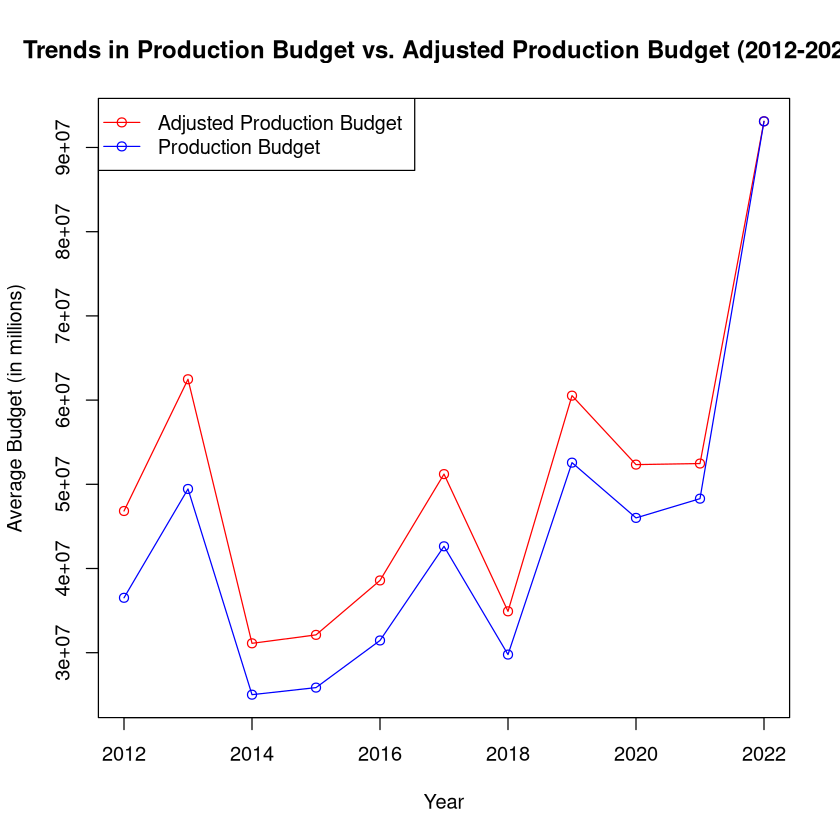

In [5]:
# Plot
# Compute average budgets per year
avg_budget <- aggregate(Production_Budget ~ Release_Year, data = df, FUN = mean, na.rm = TRUE)
avg_adj_budget <- aggregate(Adjusted_Production_Budget ~ Release_Year, data = df, FUN = mean, na.rm = TRUE)

# Sort data by year to avoid jumping curves
avg_budget <- avg_budget[order(avg_budget$Release_Year), ]
avg_adj_budget <- avg_adj_budget[order(avg_adj_budget$Release_Year), ]

# Plot the adjusted production budget vs production budget
plot(avg_adj_budget$Release_Year, avg_adj_budget$Adjusted_Production_Budget, type = "o", col = "red",
     ylim = range(c(avg_budget$Production_Budget, avg_adj_budget$Adjusted_Production_Budget)),
     xlab = "Year", ylab = "Average Budget (in millions)", main = "Trends in Production Budget vs. Adjusted Production Budget (2012-2022)")

lines(avg_budget$Release_Year, avg_budget$Production_Budget, type = "o", col = "blue")

legend("topleft", legend = c("Adjusted Production Budget", "Production Budget"),
       col = c("red", "blue"), lty = 1, pch = 1)
